<a href="https://colab.research.google.com/github/MartinPepa/HCSPD-2023/blob/principal/Semana_3_Calculo_Simbolico_Octave_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equilibrio inestable del péndulo

Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio inestable, se puede linealizar aplicando Taylor a las ecuaciones


<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta} 
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,0,0]^T$, **u**=0.

Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$. 
Se desea obtener mediante **cálculo simbólico** la versión lineal del péndulo en el equilibrio inestable.
Se emplea Taylor previo reemplazo de cos(𝛷) ≈1 y sen(𝛷)≈𝛷.
Luego se presenta el sistema matricial.


Así, para el equilibrio inestable, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+\phi \cdot {\dot{\delta}}^2\cdot long\cdot m -\phi\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{Fricc \cdot \dot{\delta}+M \cdot \phi \cdot g- \phi \cdot{\dot{\phi}}^2\cdot long\cdot m + \phi\cdot g\cdot m-u}{M\cdot long} 
\end{cases}
\end{equation*}$
<!-- 
p_pp=
                      2                    
  -Fricc⋅p_p + fi⋅fi_p ⋅long⋅m - fi⋅g⋅m + u
  ─────────────────────────────────────────
                      M                    
fi_pp=
                              2                    
  Fricc⋅p_p + M⋅fi⋅g - fi⋅fi_p ⋅long⋅m + fi⋅g⋅m - u
  ─────────────────────────────────────────────────
                        M⋅long                             -->

Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\dot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación subs().

In [ ]:
!apt-get update

In [ ]:
!apt install octave #Instala colab en el entorno de trabajo

In [ ]:
!apt install octave-symbolic #Instala el paquete simbólico de Octave, que incluye el Sympy de Python
# setenv PYTHON /usr/bin/python #si no hace falta el sympy 1.5.1

In [4]:
!pip install --user sympy==1.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 40.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Se debe agregar en el .m el path donde está el Python, mediante una línea como ésta:

---


**setenv PYTHON /usr/local/bin/python**

---


para acceder al sympy desde symbolic. No obtante, puede ser diferente el path y debe verificarse en caso de que no funcione.


In [6]:
%%writefile Controlador.m
clear all; clc;
setenv PYTHON /usr/local/bin/python %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic
%/usr/bin/python %Si se usa la sympy nueva
pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
syms fi fi_p fi_pp p p_p p_pp M m u long Fricc g;
disp('Para el equilibrio inestable')
ang_inic=0;
p_pp=(1/(M+m))*(u-m*long*fi_pp+m*long*fi_p^2*fi-Fricc*p_p); %Pequeños angulos
% fi_pp_=(1/long)*(g*sin(fi)-p_pp*cos(fi));%Expresión completa
% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1
fi_pp=solve(fi_pp==(1/long)*(g*fi-p_pp),fi_pp);
%disp('fi_pp='); pretty(simplify(fi_pp));
p_pp=subs(p_pp,'fi_pp',fi_pp);
%disp('p_pp='); pretty(simplify(p_pp))
Mat_A=[[0 1 0 0];
    [subs(subs(subs(subs(diff(p_pp, p), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, p_p), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, fi), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, fi_p), p,0),p_p,0),fi,ang_inic),fi_p,0)];
    [0 0 0 1];
    [subs(subs(subs(subs(diff(fi_pp, p), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, p_p), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, fi), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, fi_p), p,0),p_p,0),fi,ang_inic),fi_p,0)]];
Mat_B=[0;
    subs(subs(subs(subs(diff(p_pp, u), p,0),p_p,0),fi,ang_inic),fi_p,0);...
    0;
    subs(subs(subs(subs(diff(fi_pp, u), p,0),p_p,0),fi,ang_inic),fi_p,0)];
disp('A=')
pretty(simplify(Mat_A))
disp('B=')
pretty(simplify(Mat_B))
syms Mat_C;
Mat_C=[[1 0 0 0];[0 0 1 0]];
disp('C=')
(Mat_C)
disp('D=0')

Overwriting Controlador.m


Luego de generar el archivo .m en el entorno, se puede ejecutar al Octave con los comandos de línea.

In [7]:
!octave -W Controlador.m # -W : no window system

Symbolic pkg v2.8.0: Python communication link active, SymPy v1.5.1.
Para el equilibrio inestable
A=
  ⎡0     1         0      0⎤
  ⎢                        ⎥
  ⎢   -Fricc     -g⋅m      ⎥
  ⎢0  ───────    ─────    0⎥
  ⎢      M         M       ⎥
  ⎢                        ⎥
  ⎢0     0         0      1⎥
  ⎢                        ⎥
  ⎢   Fricc    g⋅(M + m)   ⎥
  ⎢0  ──────   ─────────  0⎥
  ⎣   M⋅long     M⋅long    ⎦
B=
  ⎡  0   ⎤
  ⎢      ⎥
  ⎢  1   ⎥
  ⎢  ─   ⎥
  ⎢  M   ⎥
  ⎢      ⎥
  ⎢  0   ⎥
  ⎢      ⎥
  ⎢ -1   ⎥
  ⎢──────⎥
  ⎣M⋅long⎦
C=
Mat_C =

   1   0   0   0
   0   0   1   0

D=0



# Equilibrio estable del péndulo

Se desea obtener mediante **cálculo simbólico** la versión lineal del péndulo en el equilibrio **estable**.
Se emplea Taylor previo reemplazo de cos(𝛷) ≈-1 y sen(𝛷)≈-𝛷.
Luego se presenta el sistema matricial.
Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio **estable**, se puede linealizar aplicando Taylor a las ecuaciones cuando $\phi \approx π$



<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta} 
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,\pi,0]^T$, **u**=0.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.

Así, para el equilibrio inestable, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+(\pi-\phi) \cdot {\dot{\delta}}^2\cdot long\cdot m +(\pi-\phi)\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{-Fricc \cdot \dot{\delta}+M \cdot (\pi-\phi) \cdot g+(\pi-\phi) \cdot{\dot{\phi}}^2\cdot long\cdot m +(\pi-\phi)\cdot g\cdot m+u}{M\cdot long} 
\end{cases}
\end{equation*}$
<!-- 
p_pp=
                      2                    
  -Fricc⋅p_p + fi⋅fi_p ⋅long⋅m - fi⋅g⋅m + u
  ─────────────────────────────────────────
                      M                    
fi_pp=
                              2                    
  Fricc⋅p_p + M⋅fi⋅g - fi⋅fi_p ⋅long⋅m + fi⋅g⋅m - u
  ─────────────────────────────────────────────────
                        M⋅long                             -->

Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\dot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación .subs().

In [8]:
%%writefile EqEstable.m
clear all; clc;
setenv PYTHON /usr/local/bin/python  %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic
%/usr/bin/python
pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
syms fi fi_p fi_pp p p_p p_pp M m u long Fricc g;
disp('Para el equilibrio estable')
ang_inic=pi;
p_pp=(1/(M+m))*(u+m*long*fi_pp+m*long*fi_p^2*(pi-fi)-Fricc*p_p); %Pequeños angulos
% fi_pp_=(1/long)*(g*sin(fi)-p_pp*cos(fi));%Expresión completa
% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~pi-fi, cos(fi)~1
fi_pp=solve(fi_pp==(1/long)*(g*(pi-fi)+p_pp),fi_pp);
%disp('fi_pp='); pretty(simplify(fi_pp));
p_pp=subs(p_pp,'fi_pp',fi_pp);
%disp('p_pp='); pretty(simplify(p_pp))
Mat_A=[[0 1 0 0];
    [subs(subs(subs(subs(diff(p_pp, p), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, p_p), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, fi), p,0),p_p,0),fi,ang_inic),fi_p,0), ...
    subs(subs(subs(subs(diff(p_pp, fi_p), p,0),p_p,0),fi,ang_inic),fi_p,0)];
    [0 0 0 1];
    [subs(subs(subs(subs(diff(fi_pp, p), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, p_p), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, fi), p,0),p_p,0),fi,ang_inic),fi_p,0),...
    subs(subs(subs(subs(diff(fi_pp, fi_p), p,0),p_p,0),fi,ang_inic),fi_p,0)]];
Mat_B=[0;
    subs(subs(subs(subs(diff(p_pp, u), p,0),p_p,0),fi,ang_inic),fi_p,0);...
    0;
    subs(subs(subs(subs(diff(fi_pp, u), p,0),p_p,0),fi,ang_inic),fi_p,0)];
disp('A=')
pretty(simplify(Mat_A))
disp('B=')
pretty(simplify(Mat_B))
syms Mat_C;
Mat_C=[[1 0 0 0];[0 0 1 0]];
disp('C=')
(Mat_C)
disp('D=0')

Writing EqEstable.m


In [9]:
!octave -W EqEstable.m # -W : no window system

Symbolic pkg v2.8.0: Python communication link active, SymPy v1.5.1.
Para el equilibrio estable
A=
  ⎡0     1          0       0⎤
  ⎢                          ⎥
  ⎢   -Fricc      -g⋅m       ⎥
  ⎢0  ───────     ─────     0⎥
  ⎢      M          M        ⎥
  ⎢                          ⎥
  ⎢0     0          0       1⎥
  ⎢                          ⎥
  ⎢   -Fricc   -g⋅(M + m)    ⎥
  ⎢0  ───────  ───────────  0⎥
  ⎣    M⋅long     M⋅long     ⎦
B=
  ⎡  0   ⎤
  ⎢      ⎥
  ⎢  1   ⎥
  ⎢  ─   ⎥
  ⎢  M   ⎥
  ⎢      ⎥
  ⎢  0   ⎥
  ⎢      ⎥
  ⎢  1   ⎥
  ⎢──────⎥
  ⎣M⋅long⎦
C=
Mat_C =

   1   0   0   0
   0   0   1   0

D=0



# Verificación numérica

In [13]:
%%writefile Verificacion_1.m
clc;clear all;
warning('off','all');
tic
m=.1;Fricc=0.1; long=0.6;g=9.8;M=.5;
h=0.0001;tiempo=(10/h);p_pp=0;tita_pp=0;
omega(1)=0;
%Condiciones iniciales
alfa(1)=pi-0.2; color='b';
p(1)=0; p_p(1)=0; u(1)=0; p(1)=0; i=1;
%Versión linealizada en el equilibrio estable. Sontag Pp 104.
%estado=[p(i); p_p(i); alfa(i); omega(i)]
Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 -Fricc/(long*M) -g*(m+M)/(long*M) 0]
Mat_B=[0; 1/M; 0; 1/(long*M)]
X0=[0 0 pi 0]';x=[0 0 alfa(1) 0]';
while(i<(tiempo+1))
    %Variables del sistema no lineal
    estado=[p(i); p_p(i); alfa(i); omega(i)];
    u(i)=0;
    %Sistema no lineal
    p_pp=(1/(M+m))*(u(i)-m*long*tita_pp*cos(alfa(i))+m*long*omega(i)^2*sin(alfa(i))-Fricc*p_p(i));
    tita_pp=(1/long)*(g*sin(alfa(i))-p_pp*cos(alfa(i)));
    p_p(i+1)=p_p(i)+h*p_pp;
    p(i+1)=p(i)+h*p_p(i);
    omega(i+1)=omega(i)+h*tita_pp;
    alfa(i+1)=alfa(i)+h*omega(i);
    %Variables del sistema lineal
    pl(i)=x(1); p_pl(i)=x(2);alfal(i)=x(3);omegal(i)=x(4);
    %Sistema lineal
    xp=Mat_A*(x-X0)+Mat_B*u(i);
    x=x+h*xp;
    i=i+1;
end
TCalculo=toc
disp(TCalculo)
t=0:i-1; t=t*h;u(i)=0;
pl(i)=x(1); p_pl(i)=x(2);alfal(i)=x(3);omegal(i)=x(4);
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,2,1);plot(t,omega,color);grid on; title('Velocidad Angulo');hold on;plot(t,omegal,'k');
subplot(3,2,2);plot(t,alfa,color);hold on;plot(t,pi*ones(size(t)),'k');plot(t,alfal,'k');
grid on;title('Angulo');hold on;
subplot(3,2,3); plot(t,p,color);grid on;title('Posicion carro');hold on;plot(t,pl,'k');
subplot(3,2,4);plot(t,p_p,color);grid on;title('Velocidad carro');hold on;plot(t,p_pl,'k');
subplot(3,1,3);plot(t,u,color);grid on;title('Accion de control');xlabel('Tiempo en Seg.');hold on;
hfig2 = figure(2); set(hfig2, 'Visible', 'off');
subplot(2,2,1);plot(alfa,omega,color);grid on;xlabel('Angulo');ylabel('Velocidad angular');hold on;
subplot(2,2,1);plot(alfal,omegal,'k');
subplot(2,2,2);plot(p,p_p,color);grid on;xlabel('Posicion carro');ylabel('Velocidad carro');hold on;
subplot(2,2,2);plot(pl,p_pl,'k');
%figure(1)
%figure(2)
print(hfig1,'VE_temporal','-dpng');
print(hfig2,'VE_fases','-dpng');
save('Datos_Controlador.mat','-v7');

Overwriting Verificacion_1.m


In [14]:
# -W : no window system
!octave -W Verificacion_1.m
import scipy.io
mat = scipy.io.loadmat('/content/Datos_Controlador.mat')

Mat_A =

    0.00000    1.00000    0.00000    0.00000
    0.00000   -0.20000   -1.96000    0.00000
    0.00000    0.00000    0.00000    1.00000
    0.00000   -0.33333  -19.60000    0.00000

Mat_B =

   0.00000
   2.00000
   0.00000
   3.33333

TCalculo =  17.577
 17.577


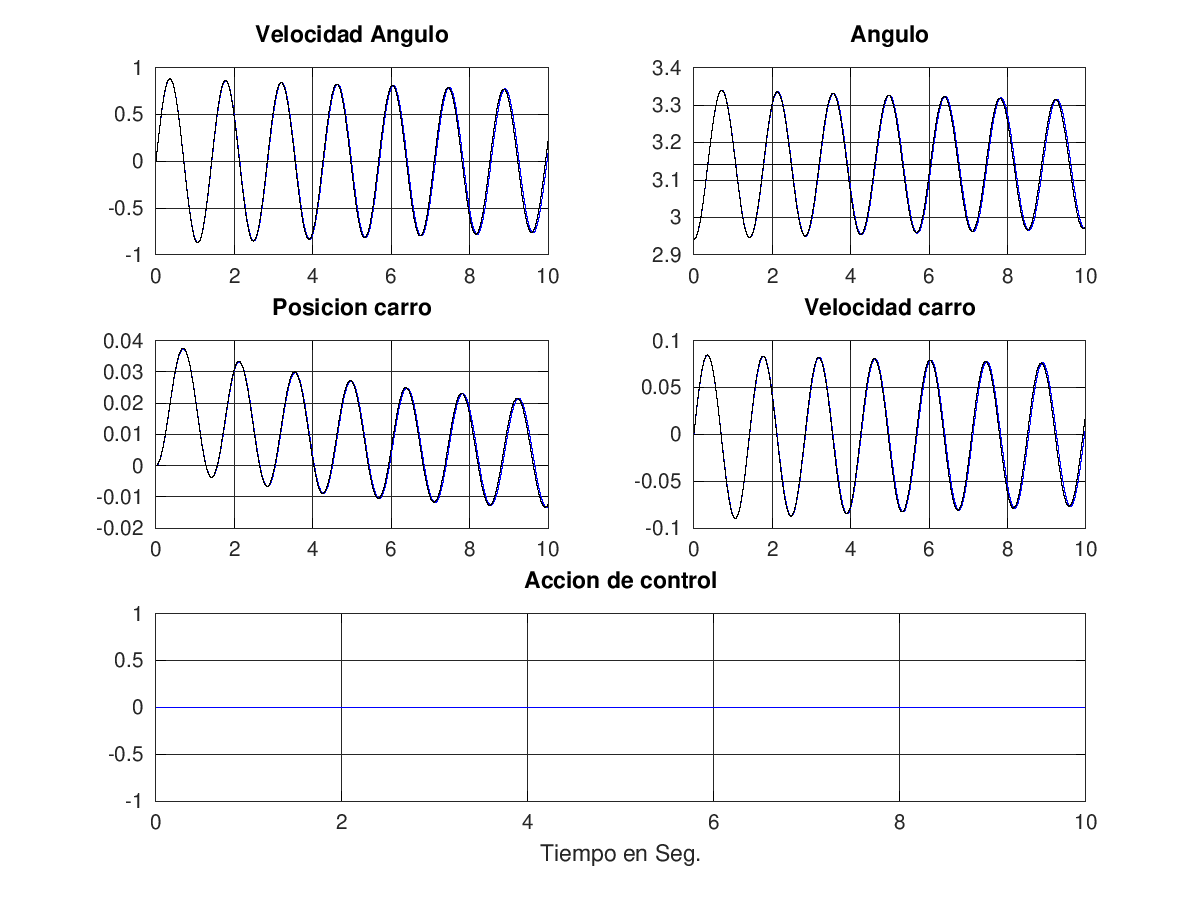

In [15]:
from PIL import Image
imt = Image.open("/content/VE_temporal.png")
imt

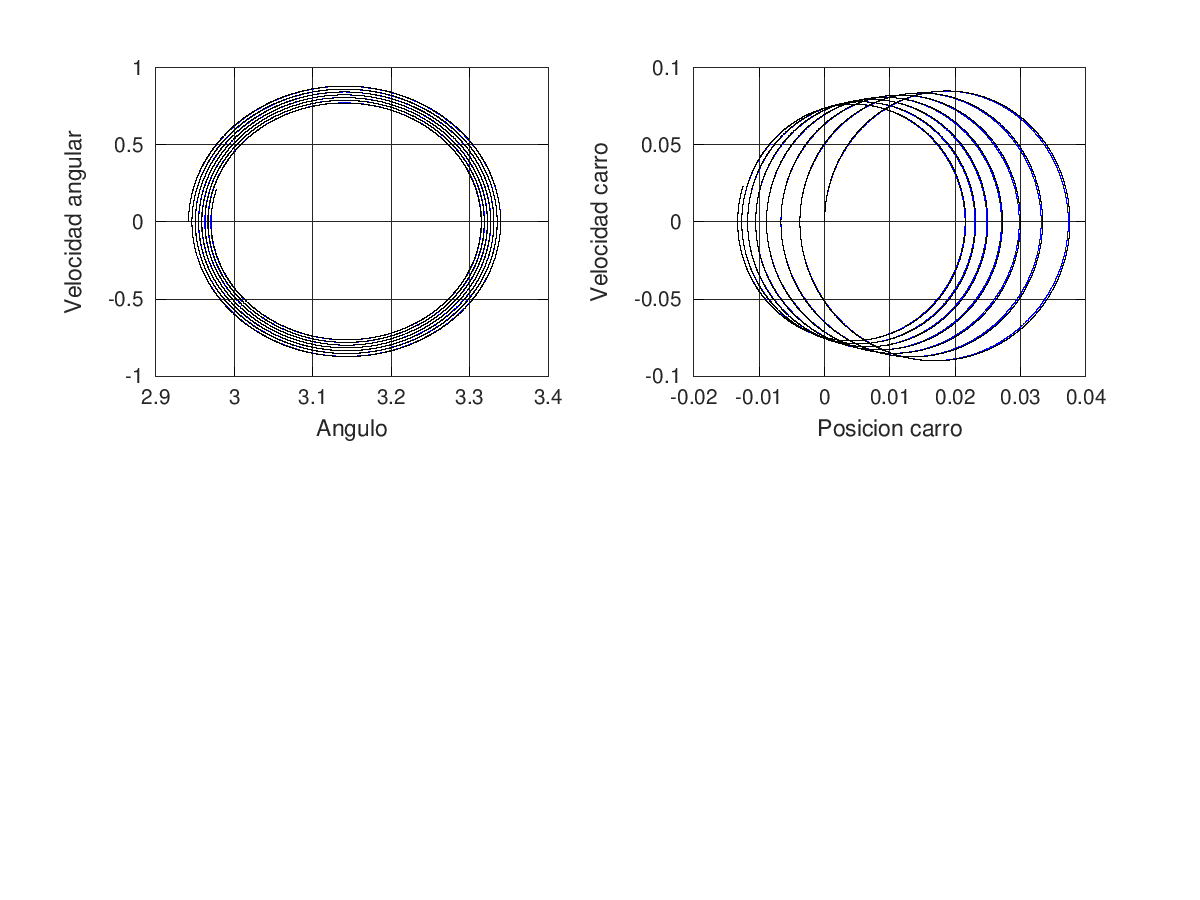

In [16]:
imt1 = Image.open("/content/VE_fases.png")
imt1

# Cierre


In [ ]:
# from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
# drive.mount('/content/drive')